In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.chrome.options import Options
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [24]:
all_links = None
if 'all_links.csv' in os.listdir('./data'):
    tmp = pd.read_csv('./data/all_links.csv')
    if tmp.count()['all_links'] == 290:
       all_links= tmp['all_links'].to_list()
else: 
    options = webdriver.ChromeOptions()
    # options.add_argument('--headless')  # Uncomment to run headlessly after confirming the script works visually
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    url = "https://www.fotmob.com/leagues/47/stats/season/20720/players/goals/premier-league-players"
    driver.get(url)

    try:
        wait = WebDriverWait(driver, 10) 
        while True:
            
            wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, '.css-fvfi51-LeagueSeasonStatsTableCSS.eybz1nb15 a')))

        
            links = driver.find_elements(By.CSS_SELECTOR, '.css-fvfi51-LeagueSeasonStatsTableCSS.eybz1nb15 a')
            for link in links:
                all_links.append(link.get_attribute('href'))

        
            next_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//div[contains(@class, 'css-fvfi51-LeagueSeasonStatsTableCSS')]//button[contains(., 'Next')]")))
            if next_button:
                next_button.click()
                
                time.sleep(5)  
            else:
                break
        pd.DataFrame({'all_links': all_links}).to_csv('./data/all_links.csv', index=False)  
    except Exception as e:
        print(f"Error navigating pages: {str(e)}")
    finally:
        driver.quit()



In [26]:
# 
all_links

['https://www.fotmob.com/players/737066/erling-haaland',
 'https://www.fotmob.com/players/1096353/cole-palmer',
 'https://www.fotmob.com/players/690107/alexander-isak',
 'https://www.fotmob.com/players/540088/ollie-watkins',
 'https://www.fotmob.com/players/591734/dominic-solanke',
 'https://www.fotmob.com/players/292462/mohamed-salah',
 'https://www.fotmob.com/players/212867/heung-min-son',
 'https://www.fotmob.com/players/523825/jarrod-bowen',
 'https://www.fotmob.com/players/815006/phil-foden',
 'https://www.fotmob.com/players/961995/bukayo-saka',
 'https://www.fotmob.com/players/1197347/nicolas-jackson',
 'https://www.fotmob.com/players/169719/chris-wood',
 'https://www.fotmob.com/players/620026/hee-chan-hwang',
 'https://www.fotmob.com/players/749736/kai-havertz',
 'https://www.fotmob.com/players/706297/jean-philippe-mateta',
 'https://www.fotmob.com/players/950561/darwin-nunez',
 'https://www.fotmob.com/players/318615/leandro-trossard',
 'https://www.fotmob.com/players/654908/ric

In [33]:

option = Options()
option.headless = True

service = Service(ChromeDriverManager().install())

driver = webdriver.Chrome(service= service, options= options)

url = "https://www.fotmob.com/players/737066/erling-haaland"

driver.get(url)

driver.implicitly_wait(10)

html = driver.page_source
driver.quit()

soup = BeautifulSoup(html, 'html.parser')

def extract_stat(soup, state_title):
    state_item  = soup.find('div',class_='css-2duihq-StatTitle', string = state_title)
    if state_item:
        return state_item.find_next('div', class_ = 'css-6xxhwd-StatValue').span.text.strip()
    return "Not Available"
stats_titles = ['Goals', 'Assists', 'Expected goals (xG)', 'Shots', 'Successful passes', 'Shots on target', 'Penalty goals', 'Expected assists (xA)',
    'Pass accuracy', 'Accurate long balls', 'Long ball accuracy', 'Chances created', 'Successful dribbles', 'Dribble success', 'Touches',
    'Touches in opposition box', 'Dispossessed', 'Fouls won', 'Penalties awarded', 'Tackles won', 'Tackles won %', 'Duels won', 'Duels won %',
    'Aerial duels won', 'Aerial duels won %', 'Interceptions', 'Blocked', 'Fouls committed', 'Recoveries', 'Possession won final 3rd', 'Dribbled past',
    'Yellow cards', 'Red cards']      

state_data = {title: extract_stat(soup, title) for title in stats_titles}  
        
        
    


In [34]:

options = Options()
options.headless = True
service = Service(ChromeDriverManager().install())

# List of player URLs
player_urls = all_links

max_players = 230

# Stats titles
stats_titles = ['Goals', 'Assists', 'Expected goals (xG)', 'Shots', 'Successful passes', 'Shots on target', 'Penalty goals', 'Expected assists (xA)',
    'Pass accuracy', 'Accurate long balls', 'Long ball accuracy', 'Chances created', 'Successful dribbles', 'Dribble success', 'Touches',
    'Touches in opposition box', 'Dispossessed', 'Fouls won', 'Penalties awarded', 'Tackles won', 'Tackles won %', 'Duels won', 'Duels won %',
    'Aerial duels won', 'Aerial duels won %', 'Interceptions', 'Blocked', 'Fouls committed', 'Recoveries', 'Possession won final 3rd', 'Dribbled past',
    'Yellow cards', 'Red cards'
                ]

all_players_stats = []

for idx, url in enumerate(player_urls[:max_players]):
    driver = webdriver.Chrome(service=service, options=options)
    driver.get(url)
    driver.implicitly_wait(10) 
    html = driver.page_source
    driver.quit()

    soup = BeautifulSoup(html, 'html.parser')

    # Extract player name
    try:
        name_tag = soup.find('h1', class_='css-xgh3st-PlayerNameCSS')
        if name_tag:
            player_name = name_tag.text.strip()
        else:
            player_name = "Unknown"
            print(f"Player's name not found for URL: {url}")
    except Exception as e:
        player_name = "Unknown"
        print(f"An error occurred while extracting player's name for URL {url}: {e}")

    player_stats = {'Name': player_name}

    player_stats.update({title: extract_stat(soup, title) for title in stats_titles})

    all_players_stats.append(player_stats)

   

    # Check if we've reached the maximum number of players
    if idx + 1 >= max_players:
        print("Maximum number of players extracted.")
        break




Player's name not found for URL: https://www.fotmob.com/players/690107/alexander-isak
Player's name not found for URL: https://www.fotmob.com/players/706297/jean-philippe-mateta
Player's name not found for URL: https://www.fotmob.com/players/974753/julian-alvarez
Player's name not found for URL: https://www.fotmob.com/players/422685/bruno-fernandes
Player's name not found for URL: https://www.fotmob.com/players/933576/antoine-semenyo
Player's name not found for URL: https://www.fotmob.com/players/654096/declan-rice
Player's name not found for URL: https://www.fotmob.com/players/637746/odsonne-edouard
Player's name not found for URL: https://www.fotmob.com/players/352887/abdoulaye-doucoure
Player's name not found for URL: https://www.fotmob.com/players/935379/dejan-kulusevski
Player's name not found for URL: https://www.fotmob.com/players/391064/neal-maupay
Player's name not found for URL: https://www.fotmob.com/players/820581/ben-brereton-diaz
Player's name not found for URL: https://w

In [35]:
footBall = pd.DataFrame(all_players_stats)

# write to a CSV
footBall.to_csv('./data/footBall.csv',index=False)
# read from a CSV
footBall = pd.read_csv('./data/footBall.csv')

In [37]:
footBall = footBall.replace('Not Available', 0)
footBall

,Name,Goals,Assists,Expected goals (xG),Shots,Successful passes,Shots on target,Penalty goals,Expected assists (xA),Pass accuracy,...,Aerial duels won,Aerial duels won %,Interceptions,Blocked,Fouls committed,Recoveries,Possession won final 3rd,Dribbled past,Yellow cards,Red cards
0,Erling Haaland,25,5,26.23,112,262,57,6,2.14,76.8%,...,36,48.0%,2,20,15,43,21,1,1,0
1,Cole Palmer,21,9,17.24,97,"1,008",44,9,7.31,83.4%,...,1,20.0%,17,26,24,93,25,11,7,0
2,Unknown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ollie Watkins,19,12,16.04,103,433,47,0,4.10,76.8%,...,47,37.6%,4,20,21,63,19,6,4,0
4,Dominic Solanke,18,3,18.80,103,385,37,2,2.00,74.0%,...,93,41.7%,7,30,41,97,29,17,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Unknown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226,Jacob Ramsey,1,1,2.17,19,254,5,0,1.37,81.9%,...,5,62.5%,3,4,7,42,5,10,2,0
227,Unknown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,Jamaal Lascelles,1,0,0.79,6,667,1,0,0.12,86.7%,...,47,64.4%,5,1,17,53,2,5,4,0


In [38]:
missing_Value = footBall.shape[0] - footBall.dropna().shape[0]
print ("%d rows have missing values in the football data" %missing_Value)

0 rows have missing values in the football data


In [39]:
footBall.isnull().sum()

Name                         0
Goals                        0
Assists                      0
Expected goals (xG)          0
Shots                        0
Successful passes            0
Shots on target              0
Penalty goals                0
Expected assists (xA)        0
Pass accuracy                0
Accurate long balls          0
Long ball accuracy           0
Chances created              0
Successful dribbles          0
Dribble success              0
Touches                      0
Touches in opposition box    0
Dispossessed                 0
Fouls won                    0
Penalties awarded            0
Tackles won                  0
Tackles won %                0
Duels won                    0
Duels won %                  0
Aerial duels won             0
Aerial duels won %           0
Interceptions                0
Blocked                      0
Fouls committed              0
Recoveries                   0
Possession won final 3rd     0
Dribbled past                0
Yellow c

In [40]:
footBall.nunique()

Name                         193
Goals                         21
Assists                       13
Expected goals (xG)          171
Shots                         76
Successful passes            180
Shots on target               42
Penalty goals                  8
Expected assists (xA)        157
Pass accuracy                135
Accurate long balls           75
Long ball accuracy           123
Chances created               60
Successful dribbles           56
Dribble success              109
Touches                      183
Touches in opposition box    109
Dispossessed                  61
Fouls won                     58
Penalties awarded              5
Tackles won                   52
Tackles won %                108
Duels won                    116
Duels won %                  138
Aerial duels won              68
Aerial duels won %           131
Interceptions                 44
Blocked                       30
Fouls committed               49
Recoveries                   118
Possession

In [41]:
footBall.describe()

,Name,Goals,Assists,Expected goals (xG),Shots,Successful passes,Shots on target,Penalty goals,Expected assists (xA),Pass accuracy,...,Aerial duels won,Aerial duels won %,Interceptions,Blocked,Fouls committed,Recoveries,Possession won final 3rd,Dribbled past,Yellow cards,Red cards
count,230,230,230,230,230,230,230,230,230,230,...,230,230,230,230,230,230,230,230,230,230
unique,193,21,13,171,76,180,42,8,157,135,...,68,131,44,30,49,118,33,47,14,4
top,Unknown,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,38,42,47,42,42,42,44,201,42,42,...,45,45,51,50,43,42,51,49,42,166


In [42]:
goals_count = footBall['Assists'].value_counts()
goals_count

Assists
1     47
0     43
0     42
2     26
3     18
4     15
5      9
7      9
9      6
6      6
8      6
10     2
12     1
Name: count, dtype: int64

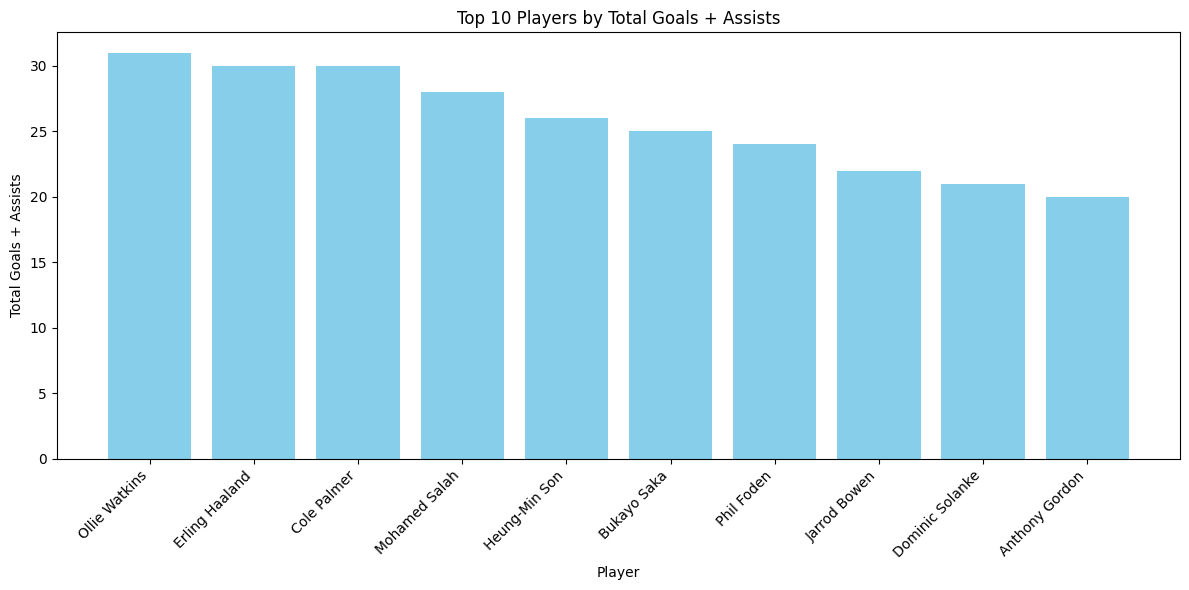

In [43]:
footBall['Goals'] = pd.to_numeric(footBall['Goals'], errors='coerce')
footBall['Assists'] = pd.to_numeric(footBall['Assists'], errors='coerce')

footBall.dropna(subset=['Goals', 'Assists'], inplace=True)


footBall['Total Goals + Assists'] = footBall['Goals'] + footBall['Assists']

footBall_sorted = footBall.sort_values(by='Total Goals + Assists', ascending=False)

# Plot the bar chart of top 10 players by total goals plus assists
plt.figure(figsize=(12, 6))
plt.bar(footBall_sorted['Name'][:10], footBall_sorted['Total Goals + Assists'][:10], color='skyblue')
plt.xlabel('Player')
plt.ylabel('Total Goals + Assists')
plt.title('Top 10 Players by Total Goals + Assists')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a int

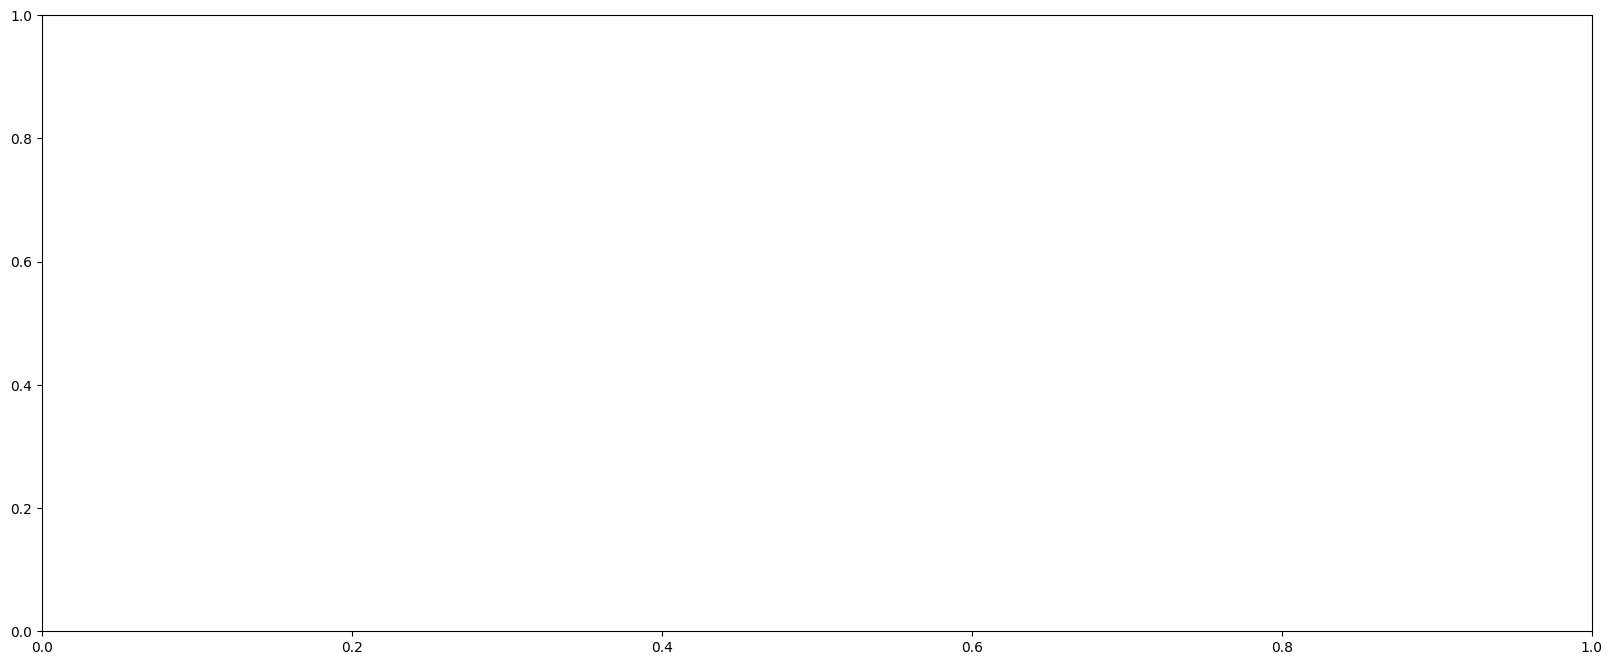

In [44]:
plt.figure(figsize=(20, 8))
plt.scatter(footBall['Expected goals (xG)'], footBall['Goals'], color='orange', alpha=0.5)
plt.xlabel('Expected goals (xG)')
plt.ylabel('Goals')
plt.title('Relationship between Goals and Expected goals (xG)')

for i, name in enumerate(footBall['Name']):
    plt.annotate(name, (footBall['Expected goals (xG)'][i], footBall['Goals'][i]), fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()

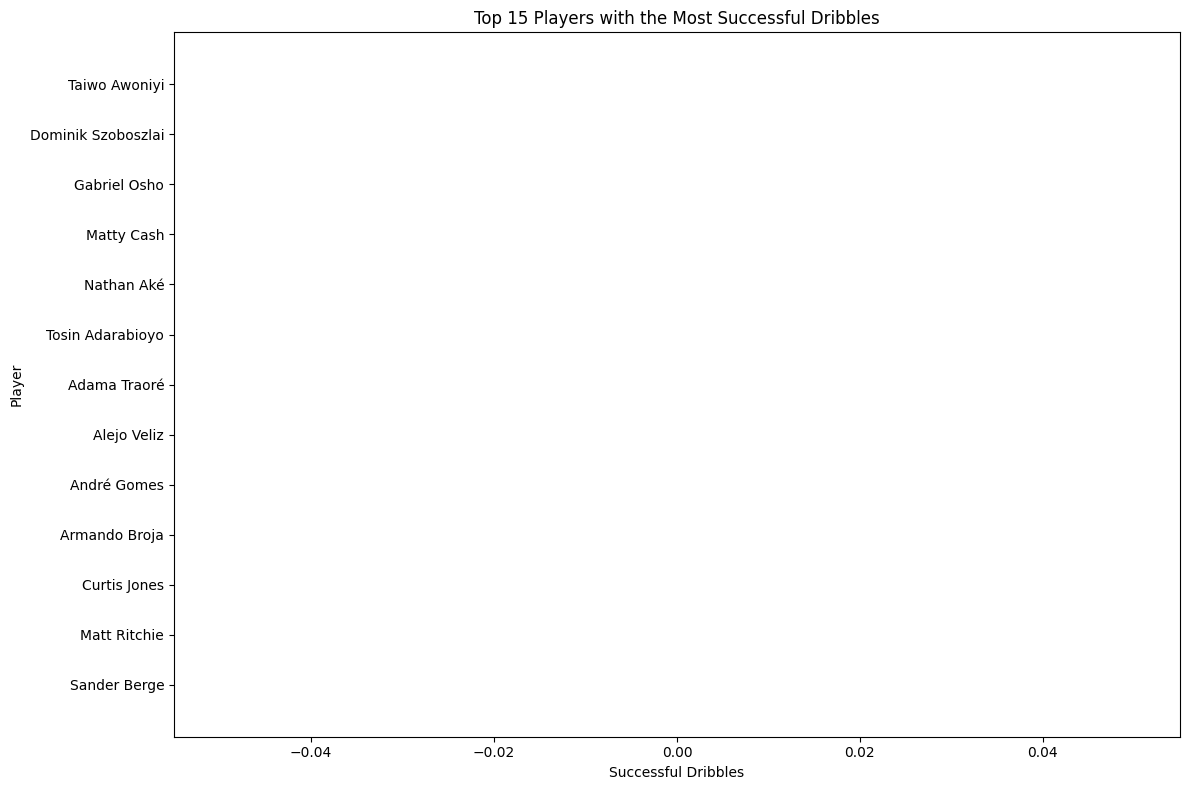

In [171]:
top_15_dribblers = footBall.sort_values(by='Successful dribbles', ascending=False).head(15)

plt.figure(figsize=(12, 8))
plt.barh(top_15_dribblers['Name'], top_15_dribblers['Successful dribbles'], color='blue')
plt.xlabel('Successful Dribbles')
plt.ylabel('Player')
plt.title('Top 15 Players with the Most Successful Dribbles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

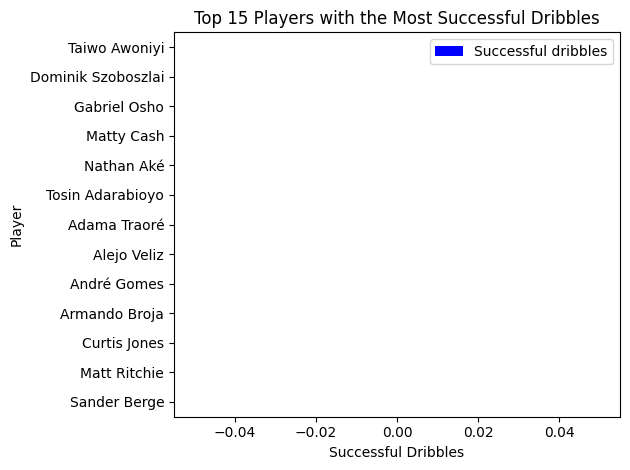

In [170]:

top_15_dribblers = footBall.sort_values(by='Successful dribbles', ascending=False).head(15)


plt.figure(figsize=(12, 8))
top_15_dribblers.plot(kind='barh', x='Name', y='Successful dribbles', color='blue')
plt.xlabel('Successful Dribbles')
plt.ylabel('Player')
plt.title('Top 15 Players with the Most Successful Dribbles')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

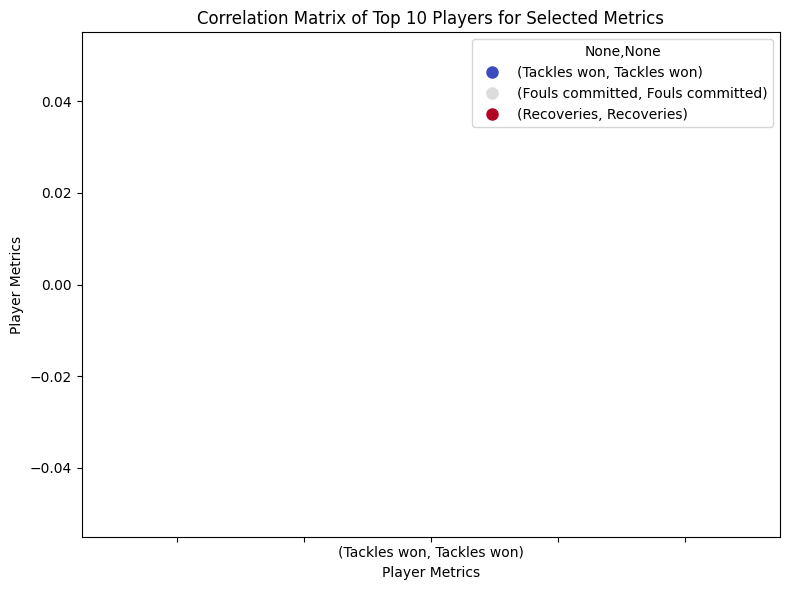

In [183]:
footBall['Fouls committed'] = pd.to_numeric(footBall['Fouls committed'], errors='coerce')


metrics = ['Tackles won', 'Fouls committed', 'Recoveries']


top_players = {}
for metric in metrics:
    top_players[metric] = footBall.nlargest(10, metric)[['Name', metric]].set_index('Name')


correlation_matrix = pd.concat(top_players, axis=1).corr()

correlation_matrix.plot(figsize=(8, 6), cmap='coolwarm', marker='o', markersize=8, linestyle='none')
plt.title('Correlation Matrix of Top 10 Players for Selected Metrics')
plt.xlabel('Player Metrics')
plt.ylabel('Player Metrics')
plt.tight_layout()
plt.show()
